# Tutoriel de Machine Learning sur les K-means 

## Problématique étudiée

La problématique étudiée est le cas avec le dataset sur les iris. L'objectif est de trouver des groupes de fleurs, sans informations préalables sur le type de fleur disponible dans le dataset (de manière aveugle).

Il s'agit donc d'un cas de **machine learning non supervisé**, et plus spécifiquement d'un cas de **clustering**.

Ce notebook va vous guider à travers ce cas concret de clustering, et va utiliser un modèle particulier de machine learning pour réaliser cette tâche : les *k-means*. Les parties suivantes sont dédiées à l'implémentation de ce modèle grâce à l'utilisation de la librairie scikit-learn.

## Code

### Importation des différentes librairies 

In [66]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn import svm, datasets
from sklearn.cluster import KMeans
from pandas.plotting import scatter_matrix
from sklearn import datasets, metrics

### Importation du dataset 

La première étape est d'importer le dataset et de voir de quoi il est constitué. Ici on importe le dataset hand-written digits.

In [52]:
# Import the hand-written digits dataset
data_sl = load_iris()

In [53]:
# Dataset description
data_sl.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

On voit grâce à la description détaillée qu'il s'agit d'un dataset qui contient plusieurs relevés sur des iris. Il contient 150 entrées réparties en 3 classes (donc 50 par classes). Nous avons de la chance, il ne manque pas de données! 

Pour chacunes des classes on retrouve 4 informations :

-la longueur des sépales, en cm (= sepal length), 

-la largueur des sépales, en cm (= sepal width),

-la longueur des pétales, en cm (= petal length),

-la largueur des pétales, en cm (= petal width),

-et la variété de l'iris : Iris-Setosa, Iris-Versicolour ou Iris-Virginica (= class).

Pour s'en assurer nous représentons quelques-unes de ce entrées :

In [54]:
# Plot some data to show what they look like
data_p = pd.DataFrame(load_iris().data, columns=load_iris().feature_names)
data_p.head()
# les classes n'apparaissent pas

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
data_p.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


Afin de réfléchir à la manière dont je décider des varaiables de mes clusters, je décide de faire de la visualisation de données :

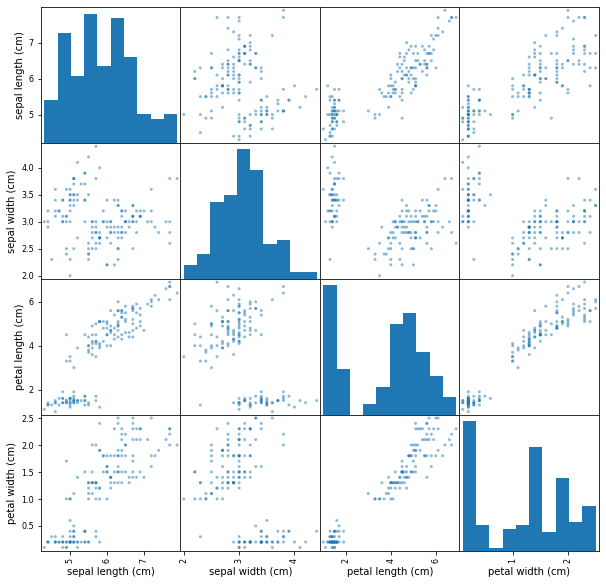

In [56]:
scatter_matrix(data_p,figsize=(10,10))
plt.show()

ici on voit que les points sont biens répartis pour la **longueur des pétales en fonction des sépales**. 
On note aussi cette dispraité quand on affiche les données. Je décide donc de partir sur ces variables pour le clustering.

### Phase de création des clusters 

En apprentissage non supervisé, il n'y a pas de valeurs de test. C'est à dire que nous utilisons uniquement des données X, sans les comparer à des valeurs Y. Pour former le clustering, l'algorithme regroupe les données similaires ensembles afin de former des clusters. Avec la technique des k-means, le code calcule la **distance entre deux points**, cette distance est appelé **descrpiteur**. Deux **données similaires ont des descripteurs qui sont proches**. Il prend ensuite la moyenne de ces descripteurs similaires pour trouver le centre de chaque groupe, on appelle ces point les **centroïdes**. 

Nous décidons de prendre la longueur des pétales et la longueur des sépales, comme expliqué au moment de la visaulisation des données. Pour ça nous créons un nouvel array avec ces deux données : 

In [58]:
# Pour appeller deux colonnes d'un tableau dans la même variable 
X = data_sl.data[:,(0,2)]

Il faut ensuite déterminer le nombre de clusters à utiliser grâce à la méthode du coude :

In [59]:
wcss = []

for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


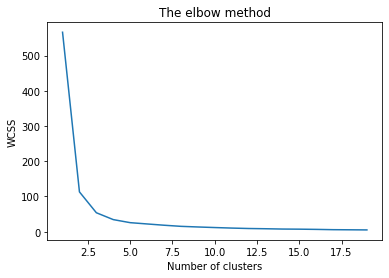

In [60]:
plt.plot(range(1, 20), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

Ici, on voit que le coude se forme au bout de 3 clusters, nous allons donc en utiliser 3.

Nous allons maintenant implémenter notre modèle : 

In [61]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

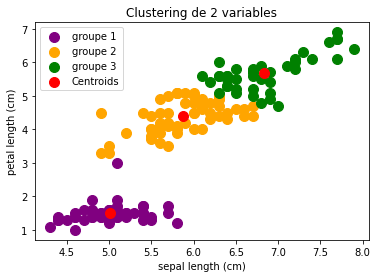

In [67]:
#Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'purple', label = "groupe 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'orange', label = "groupe 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = "groupe 3")

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.xlabel('sepal length (cm)') 
plt.ylabel('petal length (cm)')
plt.title('Clustering de 2 variables')
plt.legend()

Dans cette figue, on peut voir nos 3 groupes de clusters se former distinctement, en rouge apparaissent les centroïdes qui sont donc les moyennes des descripteurs estimés comme similaires.

### Vérification des résultats pour valider le modèle 

Une étape essentielle après le test d'un modèle de machine learning est **l'analyse de ses performances** afin de valider s'il fonctionne ou non. Cependant, en apprentissage non supervisé, il n'existe normalement pas de données de test, puisque nous n'avons pas de données de résultats labelisées. 
Ici, nous avons la chance d'avoir un jeu de données entièrement labelisé, nous pouvons donc comparer les groupes formées par nos clusters (ici "y_kmeans") aux labels de chaque entrée (les data_sl.target). 

Nous créons une variable tableau qui renvoi "False" quand le label du cluster et le label du jeu de données ne correspondent pas et nous regardons le pourcentage de réussite global dans la foulée : 

In [63]:
tableau = data_sl.target == y_kmeans
print(f"le pourcentage de vrais positifs pour les iris setosa est de {tableau.mean()*100}%.")

le pourcentage de vrais positifs pour les iris setosa est de 88.0%.


In [64]:
value = np.split(tableau, 3)
print(f"le pourcentage de vrais positifs pour les iris setosa est de {value[0].mean()*100}%.")
print(f"le pourcentage de vrais positifs pour les iris versicolor est de {value[1].mean()*100}%.")
print(f"le pourcentage de vrais positifs pour les iris virginica est de {value[2].mean()*100}%.")

le pourcentage de vrais positifs pour les iris setosa est de 100.0%.
le pourcentage de vrais positifs pour les iris versicolor est de 90.0%.
le pourcentage de vrais positifs pour les iris virginica est de 74.0%.


Notre modèle de clustering est fiable à 88% en utilisant la longueur des sépales et des pétales de chaque fleurs, on voit que dans le premier groupe, le taux de réussite est total. Pour les groupe 2 et 3, les réusltats sont plus mitigés, notament pour le dernier groupe. 

Lorsque l'on regarde le graphique, on s'apperçoit qu'une certain nombres de points sont massés autour du barycentre du groupe 3, puis que la deuxième moitiée s'étire en une forme de droite. Il n'y a donc peut être pas d'outsiders et ajouter une ou deux autres variables à nos analyses aurait peut être permis d'avoir un taux de fidélité aux données cibles plus juste. 

#### Ceci conclut notre tutoriel, et sentez-vous libre de jouer avec les paramètres du modèle pour mieux le comprendre !